## Data inspection of the real propecty sales file

File name: Real Property Sales <br> 
Location: Documents/Data Science/Fatiron School/week3/

## Step 1: Inspecting the files content

In [1]:
## Import pandas and inspect the content of the data using a DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
sales_df = pd.read_csv('raw_data/Real Property Sales.zip')
sales_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [3]:
bldg_df = pd.read_csv('raw_data/Residential Building.zip')
bldg_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,520,67,1,1,6781 MARS AVE S 98108,6781,,,MARS,AVE,...,1,0,1,1940,2014,0,0,0,3,0
1,640,7,1,1,45216 196TH AVE SE 98022,45216,,,196TH,AVE,...,1,0,0,1961,0,0,0,0,4,0
2,640,16,1,1,20410 SE 456TH WAY 98022,20410,,SE,456TH,WAY,...,0,0,0,2004,0,0,0,0,3,0
3,660,96,1,1,8501 S 259TH ST 98030,8501,,S,259TH,ST,...,0,0,0,1933,0,0,0,0,4,0
4,720,13,1,1,84 LOGAN AVE S 98055,84,,,LOGAN,AVE,...,0,0,0,1924,0,0,0,0,3,0


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 372.3+ MB


In [5]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512548 entries, 0 to 512547
Data columns (total 50 columns):
Major                 512548 non-null int64
Minor                 512548 non-null int64
BldgNbr               512548 non-null int64
NbrLivingUnits        512548 non-null int64
Address               512548 non-null object
BuildingNumber        512548 non-null object
Fraction              512548 non-null object
DirectionPrefix       511984 non-null object
StreetName            512548 non-null object
StreetType            512548 non-null object
DirectionSuffix       511984 non-null object
ZipCode               468452 non-null object
Stories               512548 non-null float64
BldgGrade             512548 non-null int64
BldgGradeVar          512548 non-null int64
SqFt1stFloor          512548 non-null int64
SqFtHalfFloor         512548 non-null int64
SqFt2ndFloor          512548 non-null int64
SqFtUpperFloor        512548 non-null int64
SqFtUnfinFull         512548 non-null int64

## Step 2: Reducing the data frames to include the relevant factors

In [6]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice', 'PrincipalUse']]
sales_df.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse
0,138860,110,08/21/2014,245000,6
1,664885,40,07/09/1991,0,0
2,423943,50,10/11/2014,0,6
3,403700,715,01/04/2013,0,6
4,951120,900,04/20/1989,85000,0


In [7]:
bldg_df = bldg_df[['Major', 'Minor', 'ZipCode', 'BldgGrade', 'SqFtTotLiving', 'Bedrooms', 'BathHalfCount'
                   , 'Bath3qtrCount', 'BathFullCount', 'YrBuilt', 'YrRenovated']]
bldg_df.head()

,Major,Minor,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,520,67,98108,7,2360,3,0,1,2,1940,2014
1,640,7,98022,6,1770,3,1,0,1,1961,0
2,640,16,98022,9,2720,3,1,0,3,2004,0
3,660,96,98030,7,1360,4,0,0,1,1933,0
4,720,13,98055,6,1270,3,0,0,1,1924,0


## Step 3: Merging the data frames together

In [8]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

In [9]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 5 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
PrincipalUse    int64
dtypes: float64(2), int64(2), object(1)
memory usage: 77.6+ MB


In [11]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [12]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,08/21/2014,245000,6,98002,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,06/12/1989,109300,0,98002,7,1490,3,0,0,2,1989,0
2,138860.0,110.0,01/16/2005,14684,6,98002,7,1490,3,0,0,2,1989,0
3,138860.0,110.0,06/08/2005,0,0,98002,7,1490,3,0,0,2,1989,0
4,423943.0,50.0,10/11/2014,0,6,98092,6,960,3,0,0,1,1969,0


## Step 4: Data cleaning

<b> Step 4.1 :  Look for nulls and decide on their outcome

In [13]:
sales_data.isna().any()

Major            False
Minor            False
DocumentDate     False
SalePrice        False
PrincipalUse     False
ZipCode           True
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathHalfCount    False
Bath3qtrCount    False
BathFullCount    False
YrBuilt          False
YrRenovated      False
dtype: bool

So far we have found that ZipCode contains null values, so we are going to investigate that column further

In [14]:
sales_data['ZipCode'].unique()

array(['98002', '98092', '98008', '98058', '98038', '98031', '98188',
       '98051', '98001', 98001.0, '98177', '98072', '98106', nan, '98059',
       98125.0, 98006.0, '98144', '98006', '98040', '98070', '98155',
       '98045', '98133', '98118', 98105.0, '98056', '98102', '98042',
       '98053', '98199', '98168', '98027', '98011', '98115', '98074',
       '98003', '98146', '98024', '98117', '98029', '98005', '98028',
       '98103', '98034', '98030', '98032', '98039', '98075', '98022',
       '98108', '98198', 98115.0, '98065', '98105', '98166', 98074.0,
       '98136', '98125', '98023', '98004', '98055', '98033', '98077',
       '98119', '98122', '98116', '98052', 98136.0, '98112', '98007',
       '98107', '98010', 98038.0, 98103.0, 98019.0, '98014', 98055.0,
       '98019', '98178', 98059.0, 98008.0, 98024.0, 98023.0, 98106.0,
       98122.0, 98031.0, '98126', 98117.0, '98148', 98030.0, 98034.0,
       '98047', '98288', '98109', 98052.0, 98003.0, 98011.0, '98224',
       98133.0,

Apart from the null values, there are string values that don't relate to particular ZipCodes (ie. 0, A, B, WA). Given that the data is categorical, we are going to turn these values into nulls and the zip codes.

In [15]:
def clean_zips(x):
    x = str(x)
    if len(x) >= 5 and x[:2] == '98':
        x = x[:5]
        return int(x)
    else:
        return np.nan

sales_data['ZipCode'] = sales_data['ZipCode'].apply(clean_zips)
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,08/21/2014,245000,6,98002.0,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,06/12/1989,109300,0,98002.0,7,1490,3,0,0,2,1989,0
2,138860.0,110.0,01/16/2005,14684,6,98002.0,7,1490,3,0,0,2,1989,0
3,138860.0,110.0,06/08/2005,0,0,98002.0,7,1490,3,0,0,2,1989,0
4,423943.0,50.0,10/11/2014,0,6,98092.0,6,960,3,0,0,1,1969,0


In [16]:
sales_data['ZipCode'].isna().sum()

118440

In [17]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

<b> Step 4.2 :  Drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

In [18]:
sales_data = sales_data.loc[~(sales_data['SalePrice'] <= 0), :]

In [19]:
sales_data = sales_data.loc[~(sales_data['SqFtTotLiving'] == 0), :]

<b> Step 4.3 :  Subseting the SalePrice for our model to reflect best the sale price of a house for an average customer more accurately.

In [20]:
lowest = np.percentile(sales_data['SalePrice'],5)
highest = np.percentile(sales_data['SalePrice'],95)

In [21]:
sales_data = sales_data[sales_data['SalePrice'] > lowest]
sales_data = sales_data[sales_data['SalePrice'] < highest]

<b> Step 4.4 : Drop properties whose principal use is not either Residential, Condominiums, Apartments and Mobile Homes

In [22]:
a = [0, 2, 4, 6, 8]
sales_data = sales_data[sales_data['PrincipalUse'].isin(a)]

In [23]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,138860.0,110.0,08/21/2014,245000,6,98002.0,7,1490,3,0,0,2,1989,0
1,138860.0,110.0,06/12/1989,109300,0,98002.0,7,1490,3,0,0,2,1989,0
6,423943.0,50.0,07/15/1999,96000,6,98092.0,6,960,3,0,0,1,1969,0
7,423943.0,50.0,01/08/2001,127500,6,98092.0,6,960,3,0,0,1,1969,0
11,403700.0,715.0,07/03/2013,464500,6,98008.0,7,1780,4,0,1,1,1957,0


In [24]:
sales_data.drop("PrincipalUse", axis=1, inplace=True)## Dropping PrincipalUse column since it is no longer useful

<b> Step 4.5 : Drop BathHalfCount and Bath3qrtCount given that a merge of these fields would lead to an inacurrate predictor

In [25]:
sales_data.drop(columns=['BathHalfCount', 'Bath3qtrCount'], axis=1, inplace=True)

<b> Step 4.6 : Find out the number of years the house has been built.

In [26]:
sales_data['DocumentDate'] = sales_data['DocumentDate'].apply(pd.Timestamp)

In [27]:
sales_data['Year'] = sales_data['DocumentDate'].apply(lambda ts: ts.year)

In [28]:
sales_data['AgeofHouse'] = sales_data['Year'] - sales_data['YrBuilt']

<b> Step 5.6: Checking for outliers

<b> 5.6.1: Bedroom outliers

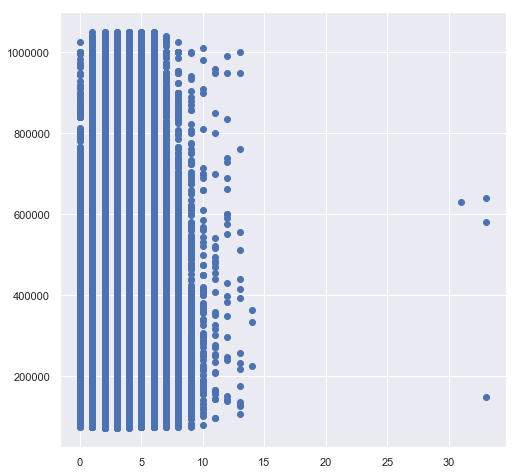

In [124]:
plt.scatter(sales_data['Bedrooms'],sales_data['SalePrice'])

In [125]:
sales_data['Bedrooms'].mean()

3.376847914489686

In [121]:
highest = np.percentile(sales_data['Bedrooms'],95)

In [122]:
highest

5.0

In [126]:
sales_data = sales_data.loc[~(sales_data['Bedrooms'] > 5), :]

<b> 5.6.2: Bathroom outliers

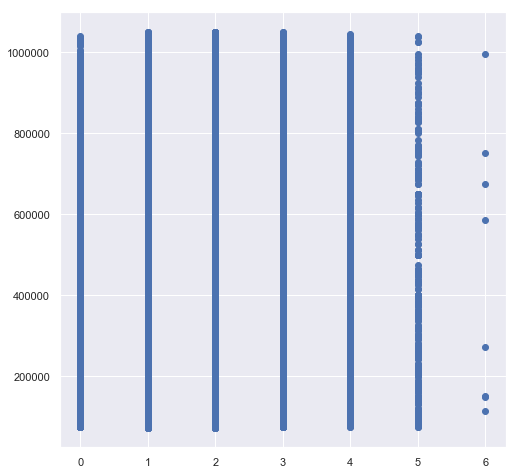

In [149]:
plt.scatter(sales_data['BathFullCount'],sales_data['SalePrice'])

In [150]:
sales_data['BathFullCount'].mean()

1.5202523347689538

In [165]:
highest = np.percentile(sales_data['BathFullCount'],95)

In [166]:
highest

3.0

In [167]:
sales_data = sales_data.loc[~(sales_data['BathFullCount'] > 3), :]

In [169]:
sales_data

,Major,Minor,DocumentDate,SalePrice,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Year
0,138860.0,110.0,2014-08-21,245000,98002.0,7,1490,3,2,1989,0,2014
1,138860.0,110.0,1989-06-12,109300,98002.0,7,1490,3,2,1989,0,1989
6,423943.0,50.0,1999-07-15,96000,98092.0,6,960,3,1,1969,0,1999
7,423943.0,50.0,2001-01-08,127500,98092.0,6,960,3,1,1969,0,2001
11,403700.0,715.0,2013-07-03,464500,98008.0,7,1780,4,1,1957,0,2013
12,403700.0,715.0,2013-02-21,357000,98008.0,7,1780,4,1,1957,0,2013
13,403700.0,715.0,1995-10-13,142000,98008.0,7,1780,4,1,1957,0,1995
14,403700.0,715.0,2007-02-22,528000,98008.0,7,1780,4,1,1957,0,2007
16,98400.0,380.0,1994-03-23,139950,98058.0,7,2050,4,1,1967,0,1994
17,98400.0,380.0,2017-03-29,439500,98058.0,7,2050,4,1,1967,0,2017


<b>Step 5.7: Re-checking for nulls

In [170]:
sales_data.isna().any()

Major            False
Minor            False
DocumentDate     False
SalePrice        False
ZipCode          False
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathFullCount    False
YrBuilt          False
YrRenovated      False
Year             False
dtype: bool

## Step 6: Running correlation between predictors and target variable

In [171]:
sales_data.corr()

,Major,Minor,SalePrice,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Year
Major,1.000000,-0.294823,0.012756,-0.004674,0.010856,-0.011743,0.007735,0.014612,0.013407,-0.018813,0.006355
Minor,-0.294823,1.000000,0.007365,-0.003368,-0.022208,0.046377,-0.040590,-0.012535,-0.027834,0.052231,0.007546
SalePrice,0.012756,0.007365,1.000000,-0.015533,0.418887,0.401089,0.191653,0.229889,0.113705,0.046481,0.560981
ZipCode,-0.004674,-0.003368,-0.015533,1.000000,-0.186699,-0.171674,-0.143556,-0.123151,-0.378942,0.071506,0.034250
BldgGrade,0.010856,-0.022208,0.418887,-0.186699,1.000000,0.751097,0.385223,0.450921,0.447215,0.003986,-0.081160
SqFtTotLiving,-0.011743,0.046377,0.401089,-0.171674,0.751097,1.000000,0.579485,0.518790,0.347267,0.060679,-0.065170
Bedrooms,0.007735,-0.040590,0.191653,-0.143556,0.385223,0.579485,1.000000,0.388744,0.219317,0.002125,-0.018970
BathFullCount,0.014612,-0.012535,0.229889,-0.123151,0.450921,0.518790,0.388744,1.000000,0.392540,0.046215,-0.000516
YrBuilt,0.013407,-0.027834,0.113705,-0.378942,0.447215,0.347267,0.219317,0.392540,1.000000,-0.234491,0.023090
YrRenovated,-0.018813,0.052231,0.046481,0.071506,0.003986,0.060679,0.002125,0.046215,-0.234491,1.000000,0.003197


Given that the calculated parameter AgeofHouse is not correlated to SalePrice, we are going to eliminate it from the model.

In [172]:
sales_data.drop(columns=['AgeofHouse'], axis=1, inplace=True)

KeyError: "['AgeofHouse'] not found in axis"

Moreover, the correlation shows that ZipCodes aren't correlated to SalePrice. However, we know that can't be true because location is almost always the most important parameter when calculating the SalePrice of a house. Therefore, we are going to use one hot encoding to turn numerical categorical data into features with nominal value.

## Step 7: Dumming the ZipCodes column

In [173]:
from sklearn.preprocessing import OneHotEncoder

sales_dfwm = sales_data

In [ ]:
sales_cdfwm = sales_data

<b>7.1 Experimenting with grouping ZipCodes into cities

In [ ]:
king_zipcode_data = pd.read_csv('raw_data/king_zipcode.csv')

In [ ]:
king_zipcode_data.head()

In [ ]:
king_zipcode_data.drop(columns=['State', 'County Name', 'Zipcode name'], axis=1, inplace=True)

In [ ]:
king_zipcode_data = king_zipcode_data.rename(columns={'Zipcode': 'ZipCode'})

In [ ]:
sales_cdfwm = sales_cdfwm.reset_index()

In [ ]:
sales_cdfwm = pd.merge(sales_cdfwm, king_zipcode_data, on=['ZipCode'], how='left')

In [ ]:
sales_cdfwm[sales_cdfwm['City'].isnull()]

In [ ]:
sales_cdfwm = sales_cdfwm.loc[~sales_cdfwm['City'].isna(), :]

In [ ]:
sales_cdfwm['City'].value_counts()

In [ ]:
c_zipcodes = sales_cdfwm["City"].values.reshape(-1, 1)
zipcodes[:10]

In [ ]:
encoder = OneHotEncoder().fit(c_zipcodes)

In [ ]:
encoder.categories_

In [ ]:
ohe = pd.DataFrame(encoder.transform(c_zipcodes).toarray(),
                   columns=encoder.get_feature_names(["City"]))

ohe.head()

In [ ]:
sales_cdfwm = sales_cdfwm.drop("City", axis=1)

In [ ]:
sales_cdfwm = pd.concat([sales_cdfwm, ohe], axis=1)

In [ ]:
sales_cdfwm.head()

In [ ]:
sales_cdfwm.corr()['SalePrice']

<b> 7.2: ZipCode Exploration

In [174]:
sales_data["ZipCode"].value_counts()

98042.0    25217
98023.0    22959
98115.0    21848
98038.0    20558
98052.0    20401
98034.0    19962
98058.0    19120
98117.0    18597
98103.0    18263
98006.0    18017
98074.0    16375
98118.0    16363
98133.0    16313
98155.0    15426
98001.0    15351
98031.0    15099
98059.0    15084
98033.0    14844
98056.0    14376
98092.0    14254
98125.0    13799
98003.0    13236
98168.0    12524
98030.0    11931
98198.0    11850
98075.0    11799
98178.0    11128
98008.0    11059
98027.0    10870
98126.0    10836
           ...  
98068.0      135
98000.0       46
98113.0       15
98134.0       10
98104.0        5
98035.0        4
98121.0        4
98083.0        4
98097.0        4
98189.0        3
98157.0        3
98017.0        3
98043.0        3
98302.0        2
98132.0        2
98009.0        2
98111.0        2
98422.0        2
98079.0        2
98405.0        2
98026.0        2
98063.0        2
98013.0        1
98018.0        1
98021.0        1
98025.0        1
98176.0        1
98054.0       

In [175]:
sales_data["ZipCode"].unique()

array([98002., 98092., 98008., 98058., 98038., 98031., 98188., 98051.,
       98001., 98072., 98106., 98059., 98125., 98006., 98144., 98070.,
       98155., 98045., 98133., 98105., 98102., 98042., 98053., 98168.,
       98027., 98011., 98115., 98074., 98003., 98024., 98117., 98029.,
       98005., 98028., 98103., 98034., 98030., 98032., 98039., 98075.,
       98022., 98040., 98199., 98177., 98108., 98118., 98065., 98166.,
       98136., 98023., 98055., 98033., 98077., 98119., 98122., 98116.,
       98146., 98052., 98112., 98007., 98107., 98004., 98198., 98010.,
       98056., 98019., 98014., 98178., 98126., 98148., 98047., 98109.,
       98224., 98354., 98068., 98288., 98050., 98083., 98057., 98302.,
       98121., 98113., 98000., 98035., 98134., 98422., 98132., 98104.,
       98026., 98043., 98157., 98097., 98189., 98017., 98044., 98025.,
       98111., 98018., 98079., 98021., 98405., 98009., 98063., 98013.,
       98176., 98101., 98054.])

In [176]:
zipcodes = sales_dfwm["ZipCode"].values.reshape(-1, 1)

In [177]:
encoder = OneHotEncoder().fit(zipcodes)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [178]:
encoder.categories_

[array([98000., 98001., 98002., 98003., 98004., 98005., 98006., 98007.,
        98008., 98009., 98010., 98011., 98013., 98014., 98017., 98018.,
        98019., 98021., 98022., 98023., 98024., 98025., 98026., 98027.,
        98028., 98029., 98030., 98031., 98032., 98033., 98034., 98035.,
        98038., 98039., 98040., 98042., 98043., 98044., 98045., 98047.,
        98050., 98051., 98052., 98053., 98054., 98055., 98056., 98057.,
        98058., 98059., 98063., 98065., 98068., 98070., 98072., 98074.,
        98075., 98077., 98079., 98083., 98092., 98097., 98101., 98102.,
        98103., 98104., 98105., 98106., 98107., 98108., 98109., 98111.,
        98112., 98113., 98115., 98116., 98117., 98118., 98119., 98121.,
        98122., 98125., 98126., 98132., 98133., 98134., 98136., 98144.,
        98146., 98148., 98155., 98157., 98166., 98168., 98176., 98177.,
        98178., 98188., 98189., 98198., 98199., 98224., 98288., 98302.,
        98354., 98405., 98422.])]

In [179]:
ohe = pd.DataFrame(encoder.transform(zipcodes).toarray(),
                   columns=encoder.get_feature_names(["ZipCode"]))

ohe.head()

,ZipCode_98000.0,ZipCode_98001.0,ZipCode_98002.0,ZipCode_98003.0,ZipCode_98004.0,ZipCode_98005.0,ZipCode_98006.0,ZipCode_98007.0,ZipCode_98008.0,ZipCode_98009.0,...,ZipCode_98188.0,ZipCode_98189.0,ZipCode_98198.0,ZipCode_98199.0,ZipCode_98224.0,ZipCode_98288.0,ZipCode_98302.0,ZipCode_98354.0,ZipCode_98405.0,ZipCode_98422.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
sales_dfwm = sales_dfwm.drop(columns=["ZipCode"])

In [181]:
sales_dfwm = sales_dfwm.reset_index()

In [182]:
sales_dfwm = pd.concat([sales_dfwm, ohe], axis=1)

In [183]:
sales_dfwm.shape

(770187, 119)

In [184]:
sales_dfwm.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Year               0.560981
BldgGrade          0.418887
SqFtTotLiving      0.401089
BathFullCount      0.229889
Bedrooms           0.191653
YrBuilt            0.113705
ZipCode_98075.0    0.105712
ZipCode_98040.0    0.096452
ZipCode_98053.0    0.080631
ZipCode_98006.0    0.073189
ZipCode_98112.0    0.069537
ZipCode_98004.0    0.066319
ZipCode_98074.0    0.064603
ZipCode_98199.0    0.059977
ZipCode_98033.0    0.053974
ZipCode_98119.0    0.051357
ZipCode_98052.0    0.051041
ZipCode_98077.0    0.050600
ZipCode_98105.0    0.046990
ZipCode_98027.0    0.046918
YrRenovated        0.046481
ZipCode_98102.0    0.045659
ZipCode_98005.0    0.044736
ZipCode_98109.0    0.043682
ZipCode_98029.0    0.042517
ZipCode_98065.0    0.040936
ZipCode_98039.0    0.033997
ZipCode_98116.0    0.032136
ZipCode_98115.0    0.032077
                     ...   
ZipCode_98354.0   -0.014027
ZipCode_98056.0   -0.015047
ZipCode_98288.0   -0.015846
ZipCode_98010.0   -0.019634
ZipCode_98038.0   -0

## Step 8: Running a simple linear regression

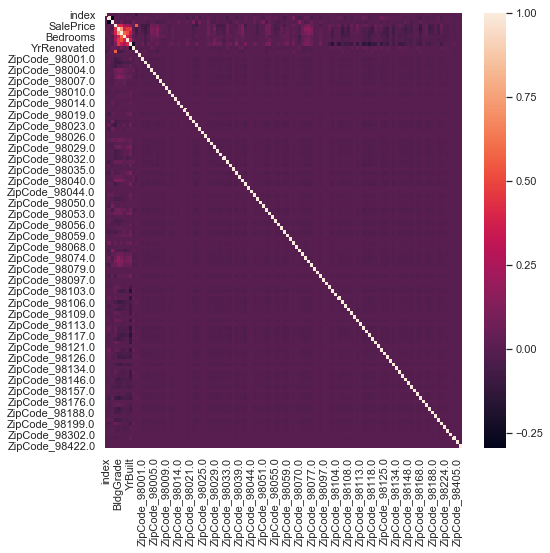

In [185]:
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(sales_dfwm.corr())

<b>7.1 Multiple Linear Regression Using OLS In Statsmodel

In [187]:
X = sales_dfwm[['SqFtTotLiving', 'BathFullCount', 'Bedrooms', 'YrBuilt', 'ZipCode_98075.0', 'ZipCode_98053.0'
               , 'ZipCode_98040.0', 'ZipCode_98074.0', 'ZipCode_98006.0', 'ZipCode_98112.0', 'ZipCode_98065.0'
               , 'ZipCode_98077.0', 'ZipCode_98199.0', 'ZipCode_98052.0', 'ZipCode_98004.0', 'ZipCode_98027.0'
               , 'ZipCode_98119.0', 'ZipCode_98029.0', 'ZipCode_98105.0', 'ZipCode_98033.0', 'ZipCode_98102.0'
               , 'ZipCode_98109.0', 'ZipCode_98005.0', 'ZipCode_98072.0', 'ZipCode_98116.0', 'ZipCode_98103.0']]
y = sales_dfwm['SalePrice']

In [188]:
predictors = np.asarray(X)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     7859.
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:08:49   Log-Likelihood:            -1.0415e+07
No. Observations:              770187   AIC:                         2.083e+07
Df Residuals:                  770160   BIC:                         2.083e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.817e+05   1.71e+04     16.443      0.000    2.48e+05    3.15e+05
x1            88.3465      0.356    248.059      0.000      87.649      89.045
x2          1.267e+04    412.544     30.713      0.000    1.19e+04    1.35e+04
x3         -1.053e+04    310.076    -33.952      0.000   -1.11e+04   -9919.993
x4           -71.2934      8.818     -8.085      0.000     -88.576     -54.011
x5          1.191e+05   1707.975     69.737      0.000    1.16e+05    1.22e+05
x6          1.147e+05   1794.102     63.931      0.000    1.11e+05    1.18e+05
x7          1.526e+05   2114.826     72.177      0.000    1.48e+05    1.57e+05
x8          6.885e+04   1448.602     47.529      0.000     6.6e+04    7.17e+04
x9          7.245e+04   1383.627     52.360      0.000    6.97e+04    7.52e+04
x10         1.462e+05   2122.557     68.885      0.000    1.42e+05     1.5e+05
x11         8.582e+04   2271.454     37.782      0.000    8.14e+04    9.03e+04
x12         5.239e+04   2059.763     25.435      0.000    4.84e+04    5.64e+04
x13         1.226e+05   1860.679     65.915      0.000    1.19e+05    1.26e+05
x14         6.911e+04   1295.217     53.357      0.000    6.66e+04    7.16e+04
x15         9.494e+04   2283.219     41.582      0.000    9.05e+04    9.94e+04
x16         6.377e+04   1759.258     36.249      0.000    6.03e+04    6.72e+04
x17         1.438e+05   2446.931     58.770      0.000    1.39e+05    1.49e+05
x18         7.641e+04   1795.334     42.561      0.000    7.29e+04    7.99e+04
x19          1.12e+05   1971.216     56.793      0.000    1.08e+05    1.16e+05
x20         8.325e+04   1506.850     55.249      0.000    8.03e+04    8.62e+04
x21         1.688e+05   3585.248     47.074      0.000    1.62e+05    1.76e+05
x22         1.482e+05   3158.373     46.914      0.000    1.42e+05    1.54e+05
x23         8.306e+04   2561.956     32.422      0.000     7.8e+04    8.81e+04
x24         4.132e+04   1855.342     22.272      0.000    3.77e+04     4.5e+04
x25         9.619e+04   1776.611     54.144      0.000    9.27e+04    9.97e+04
x26         9.056e+04   1381.187     65.569      0.000    8.79e+04    9.33e+04
==============================================================================
Omnibus:                    90082.591   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135342.777
Skew:                           0.867   Prob(JB):                         0.00
Kurtosis:                       4.101   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
""

<b>7.2 Multiple Linear Regression Using Sklearn

In [189]:
np.random.seed(33)

# Now let's split our data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [190]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit_transform() method.

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [191]:
# Now we can fit the LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
lr.score(ss.transform(X_test), y_test)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.20743039700579546

In [193]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([72673.91636066,  7594.03886401, -8635.46415028, -2142.46716724,
       14618.07044504, 13271.61524375, 15018.64055275,  9791.09032346,
       10772.57693199, 14182.3481183 ,  7851.08464853,  5404.94537527,
       13612.64997051, 11044.64853716,  8731.91937725,  7518.8429458 ,
       12299.65401379,  8807.04654437, 11763.2294615 , 11139.8672445 ,
        9655.04099175,  9562.98400567,  6660.75368698,  4650.0408318 ,
       11115.6898427 , 13833.53771198])

<b> SKlearn Metrics

In [194]:
metrics.r2_score(y_test, lr.predict(ss.transform(X_test)))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.20743039700579546

In [195]:
metrics.mean_absolute_error(y_test, lr.predict(ss.transform(X_test)))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


139332.04401104743

In [196]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(ss.transform(X_test))))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


181259.82544775185